In [1]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import HashingVectorizer
import re,collections
import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in metadata.csv file

In [6]:
metadata_df = pd.read_csv("Metadata.csv",encoding='ISO-8859-15', header = None, low_memory = False)
df = metadata_df.loc[:, 0:12]
df.columns = ['ID', 'URL', 'Designer', 'Company_Name', 'Date', 'Tags', 'Views', 'Likes', 'Saves', 'Comments','Attachments',"Title", "Description"]
df

,ID,URL,Designer,Company_Name,Date,Tags,Views,Likes,Saves,Comments,Attachments,Title,Description
0,4000000,https://dribbble.com/shots/4000000,NatalieSchnelzer,NaN,2017/12/6,003 30 days of ui colorful daily ui ...,342,19,0,0,NaN,NaN,NaN
1,4000002,https://dribbble.com/shots/4000002,vicbell,NaN,2017/12/6,collection dunelm icon iconography ...,"3,982",130,13,0,NaN,NaN,NaN
2,4000004,https://dribbble.com/shots/4000004,Delta9_Creative,NaN,2017/12/6,canvas canvas art dekoration design ...,99,16,0,0,NaN,NaN,NaN
3,4000007,https://dribbble.com/shots/4000007,arashmanteghi,NaN,2017/12/6,calendar date flipper graphic persi...,303,40,0,2,NaN,NaN,NaN
4,4000008,https://dribbble.com/shots/4000008,STUDIOJQ,NaN,2017/12/6,NaN,"4,835",192,19,0,NaN,NaN,NaN
5,4000009,https://dribbble.com/shots/4000009,kodochigov,NaN,2017/12/6,art branding design fesftival ident...,105,13,0,0,NaN,NaN,NaN
6,4000010,https://dribbble.com/shots/4000010,ccccccc,NaN,2017/12/6,glitchy titles,"1,661",82,5,6,NaN,NaN,NaN
7,4000011,https://dribbble.com/shots/4000011,Delta9_Creative,NaN,2017/12/6,budapest design graphic design illust...,84,13,0,0,NaN,NaN,NaN
8,4000012,https://dribbble.com/shots/4000012,joseprosello,janeandrosello,2017/12/6,blockchain crypto cryptocurrency elix...,"1,175",54,8,0,NaN,NaN,NaN
9,4000013,https://dribbble.com/shots/4000013,DesignerBaniya,NaN,2017/12/6,design news responsive ui ux web ...,257,14,0,0,NaN,NaN,NaN


## Separate tags and count the number

In [7]:
def get_tags(dataset):
    words_box=[]
    for line in dataset:
        line = str(line)
        if re.match(r'[a-zA-Z0-9]*',line):
            words_box.extend(line.lower().split())   
    return collections.Counter(words_box)

In [8]:
# Drop the nan entries in tags.
tags=df['Tags'].dropna(axis = 0) 
tags = get_tags(tags)
tags_dataframe = pd.DataFrame.from_dict(tags, orient='index')

# Order the tags in decending order by the number.
tags_dataframe = tags_dataframe.sort_values(by = 0, axis = 0, ascending=False)
tags_dataframe

,0
design,76756
illustration,53476
logo,48809
ui,42157
ux,24469
branding,19840
app,19478
web,18028
vector,17156
animation,16429


## Plot the most common semantic tags

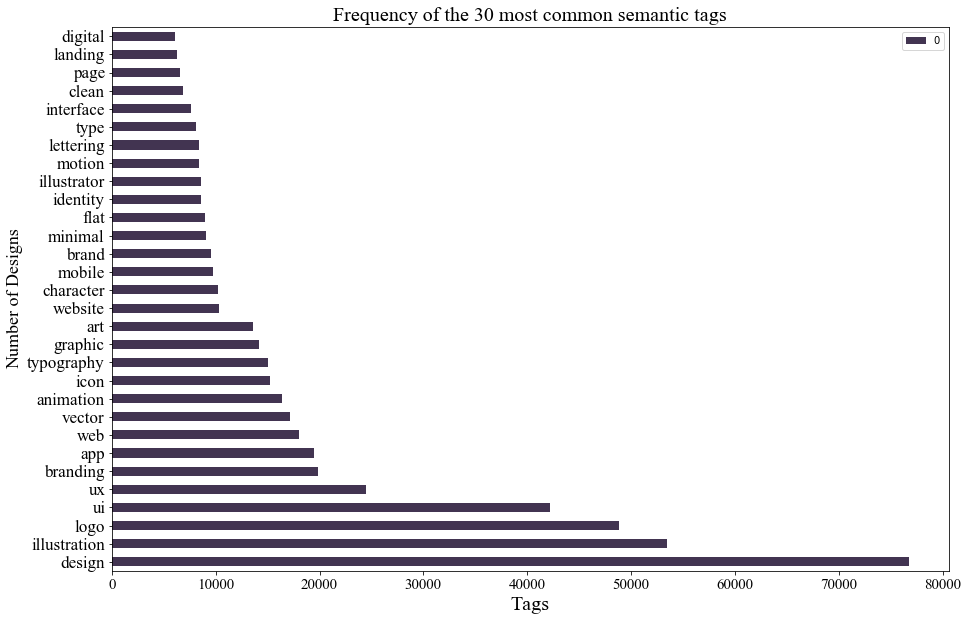

In [88]:
plt.style.use({'figure.figsize':(15,10)})

# Top 30 most common semantic tags.
ax =tags_dataframe[:30].plot(kind='barh',color=sns.cubehelix_palette(10,reverse=True),alpha = 0.9)
ax.set_adjustable
plt.xlabel('Tags', fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.ylabel('Number of Designs', fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.xticks(fontproperties = 'Times New Roman', size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 17)
plt.title('Frequency of the 30 most common semantic tags', fontdict={'family' : 'Times New Roman', 'size'   : 20})

# Save the graph.
plt.savefig("30most.png", dpi = 200)

Print out the total number of semantic tags and the top x most common tags with their appeared times.

In [10]:
print("There are %d different semantic tags in the dataset." % len(tags))
print ("The 30 most common tags are: ")
print(tags.most_common(30))

There are totally 58555 different semantic tags in the dataset.
The 30 most common tags are: 
[('design', 76756), ('illustration', 53476), ('logo', 48809), ('ui', 42157), ('ux', 24469), ('branding', 19840), ('app', 19478), ('web', 18028), ('vector', 17156), ('animation', 16429), ('icon', 15244), ('typography', 15011), ('graphic', 14187), ('art', 13610), ('website', 10294), ('character', 10270), ('mobile', 9731), ('brand', 9561), ('minimal', 9094), ('flat', 8969), ('identity', 8613), ('illustrator', 8604), ('motion', 8429), ('lettering', 8347), ('type', 8149), ('interface', 7621), ('clean', 6825), ('page', 6567), ('landing', 6238), ('digital', 6126)]


## Tag frequency

In [12]:
# Calculate the frequency of each tag in the dataframe
def freq(dataframe):
    for line in dataframe:
        dataframe = dataframe/dataframe.sum()
    return dataframe

# Print the top 30 tags with their frequency.
tags_frequency = freq(tags_dataframe)
tags_frequency[:30]

,0
design,0.042908
illustration,0.029894
logo,0.027285
ui,0.023567
ux,0.013679
branding,0.011091
app,0.010889
web,0.010078
vector,0.009591
animation,0.009184


Text(0.5,1,'Top 30 high frequency tags')

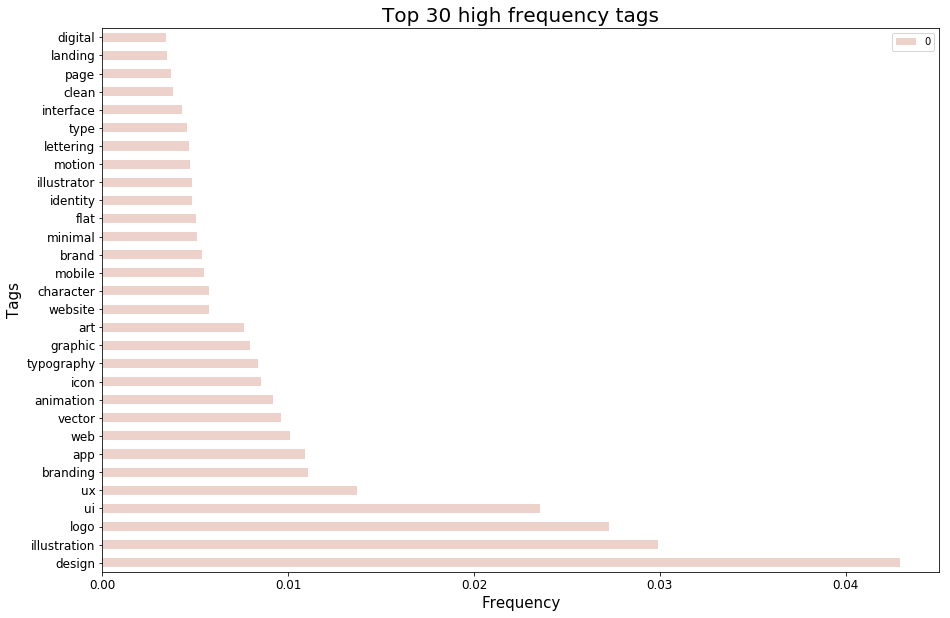

In [15]:
# Plot high frequency words.
plt.style.use({'figure.figsize':(15,10)})
ax = tags_frequency[:30].plot(kind = 'barh', color=sns.cubehelix_palette(10,reverse=False))
ax.set_adjustable
ax.set_xlabel('Frequency', fontsize = 15)
ax.set_ylabel('Tags', fontsize = 15)
ax.tick_params(axis = 'x',labelsize=12) 
ax.tick_params(axis = 'y',labelsize=12) 
ax.set_title('Top 30 high frequency tags', fontsize=20)